In [6]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install --user --upgrade tensorflow-gpu

Requirement already up-to-date: tensorflow-gpu in c:\users\user\appdata\roaming\python\python37\site-packages (2.2.0)
Note: you may need to restart the kernel to use updated packages.


In [275]:
import pandas as pd
import numpy as np
import math
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
plt.style.use('fivethirtyeight')

In [498]:
df_age = pd.read_csv('Characteristics_Corona_patients version 5 19-7-20.csv')
array = ['vietnam', 'singapore', 'southkorea', 'japan', 'philippines', 'indonesia', 'india', 'thailand', 'korea']
new_data = df_age.loc[df_age['country'].isin(array)]
new_data.dropna(axis='columns', how='all')


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2,4,7,8,9,11,12,13,14,15,17,18,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,age_band,background_diseases,background_diseases_binary,city,confirmed_date,country,date_onset_symptoms,deceased_date,infected_by,...,confirmed_date_D,deceased_date_D,released_date_D,return_date_D,date_onset_symptoms_D,return_date_until_date_onset_symptoms,date_onset_symptoms_until_confirmed_date,confirmed_date_until_released_date,confirmed_date_until_deceased_date,severity_illness_infectious_person
2100,NaN,30.0,NaN,NaN,NaN,2020-01-15,japan,NaN,NaN,NaN,...,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,NaN,40.0,NaN,NaN,NaN,2020-01-24,japan,NaN,NaN,NaN,...,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,NaN,30.0,NaN,NaN,NaN,2020-01-25,japan,NaN,NaN,NaN,...,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,NaN,40.0,NaN,NaN,NaN,2020-01-26,japan,NaN,NaN,18,...,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good
2104,NaN,40.0,NaN,NaN,NaN,2020-01-28,japan,NaN,NaN,NaN,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,NaN,60.0,NaN,NaN,NaN,2020-01-28,japan,NaN,NaN,"7, 12",...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,NaN,40.0,NaN,NaN,NaN,2020-01-28,japan,NaN,NaN,NaN,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2107,NaN,40.0,NaN,NaN,NaN,2020-01-29,japan,NaN,NaN,5,...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,critical
2108,NaN,50.0,NaN,NaN,NaN,2020-01-30,japan,NaN,NaN,NaN,...,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109,NaN,30.0,NaN,NaN,NaN,2020-01-30,japan,NaN,NaN,NaN,...,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analysing Age Band And Number Of Cases

In [5]:
#clearing rows with NaN
new_data.dropna(subset = ["age_band"], inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [421]:
new_data.groupby(['age_band']).size()
new_data['age_band'].unique()

array([ 30.,  40.,  60.,  50.,  20.,  80.,  70.,   0.,  10.,  90., 100.])

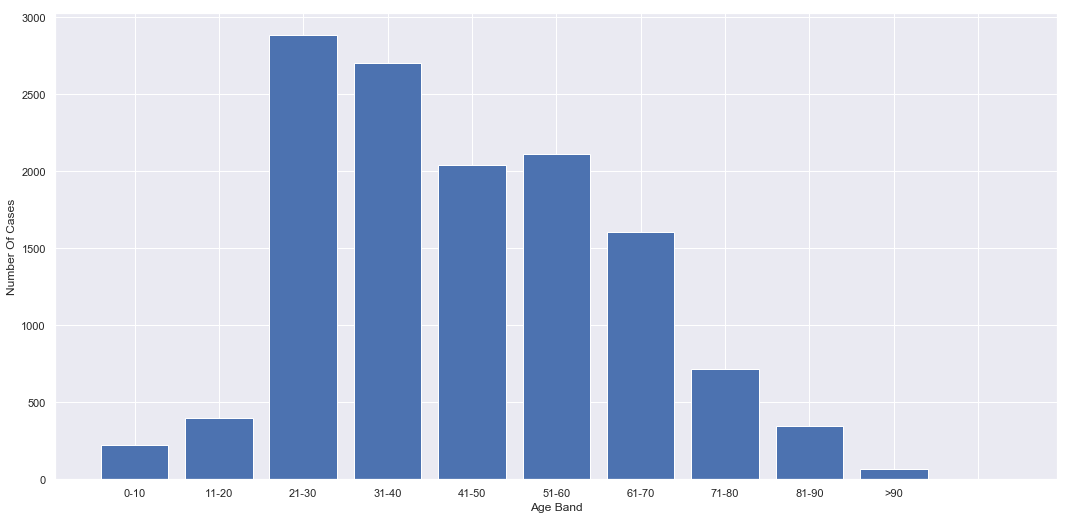

<Figure size 720x1440 with 0 Axes>

In [433]:
import matplotlib.pyplot as plt

# count number of cases for each age band  
new_data.groupby(['age_band']).size()

age_band =[ 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
plt.bar(age_band,new_data.groupby(['age_band']).size(), width = 8  )      
plt.xticks(age_band)
plt.ylabel('Number Of Cases')
plt.xlabel('Age Band')
positions = [0, 10, 20, 30, 40, 50, 60 ,70, 80, 90, 100]
labels = ('0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '>90')
plt.xticks(positions, labels)
plt.figure(figsize=(10, 20))
plt.show()

#### Anlysing Sex And Number Of Cases

In [8]:

new_data.groupby(['sex']).size()

sex
female    4946
male      8091
dtype: int64

#### Analysing Death Rate With Age Band

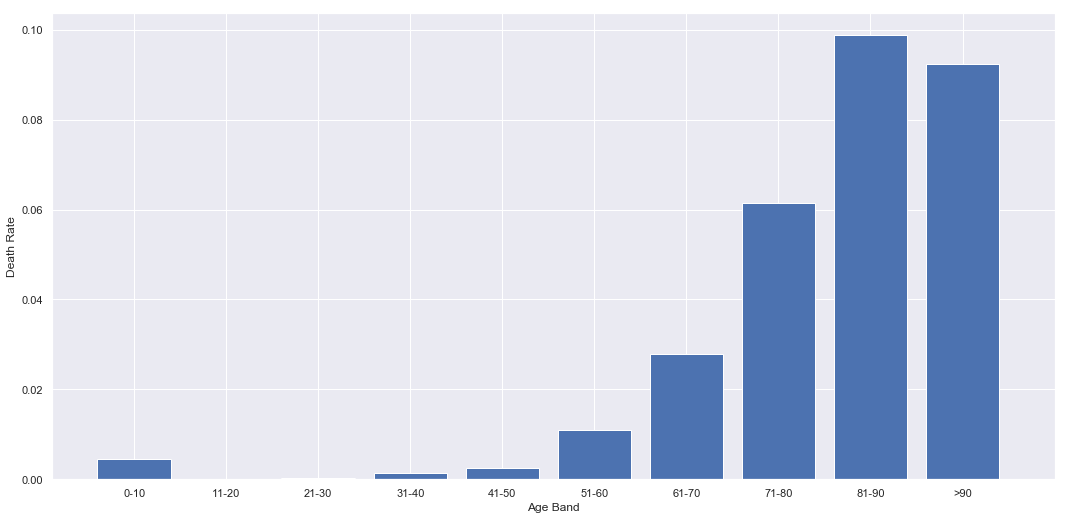

<Figure size 720x1440 with 0 Axes>

In [431]:
# count number of cases for each age band  
new_data.groupby(['age_band']).size()
# filtering out null data
dd = new_data[pd.notnull(new_data['deceased_date'])]

age_band =[ 0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
plt.bar(age_band,dd.groupby(['age_band']).size()/new_data.groupby(['age_band']).size(), width = 8)      
plt.ylabel('Death Rate')
plt.xlabel('Age Band')
positions = [0, 10, 20, 30, 40, 50, 60 ,70, 80, 90, 100]
labels = ('0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '>90')
plt.xticks(positions, labels)
plt.figure(figsize=(10, 20))
plt.show()


#### Analysing Cases By Country

In [468]:
df_rates = pd.read_csv('Datathon Covid Cases.csv')
df_rates.dropna(subset = ["Confirmed Cases"], inplace=True)
df_rates.head()
array = ['Armenia', 'Azerbaijan', 'Bahrain','Bangladesh','Bhutan', 'Brunei','Cambodia', 'China','Cyprus','Georgia' ,'Indonesia', 'India','Iran','Iraq','Israel','Japan','Jordan', 'Kazakhstan','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','Oman','Pakistan', 'Philippines', 'Qatar','Singapore','South Korea','Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste','Turkey','Turkmenistan','Vietnam', 'Yemen']
df_rates_new = df_rates.loc[df_rates['Country'].isin(array)]
df_rates_new = df_rates_new.reset_index()
df_rates_new

,index,Country,Confirmed Cases,Recovered,Deaths
0,0,Armenia,36162.0,25244.0,688.0
1,1,Azerbaijan,38980.0,20974.0,391.0
2,2,Bahrain,37996.0,34412.0,134.0
3,3,Bangladesh,218658.0,120976.0,2836.0
4,4,Bhutan,92.0,83.0,0.0
5,5,Brunei,141.0,138.0,3.0
6,6,Cambodia,202.0,142.0,0.0
7,7,China,85921.0,80519.0,4653.0
8,8,Cyprus,1040.0,847.0,19.0
9,9,Georgia,1073.0,907.0,16.0


In [469]:
df_rates_new['Confirmed Cases'].dtype

dtype('float64')

In [470]:
df_rates_new.shape
#inx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
df_rates_new.reset_index()
df_rates_new.shape

(41, 5)

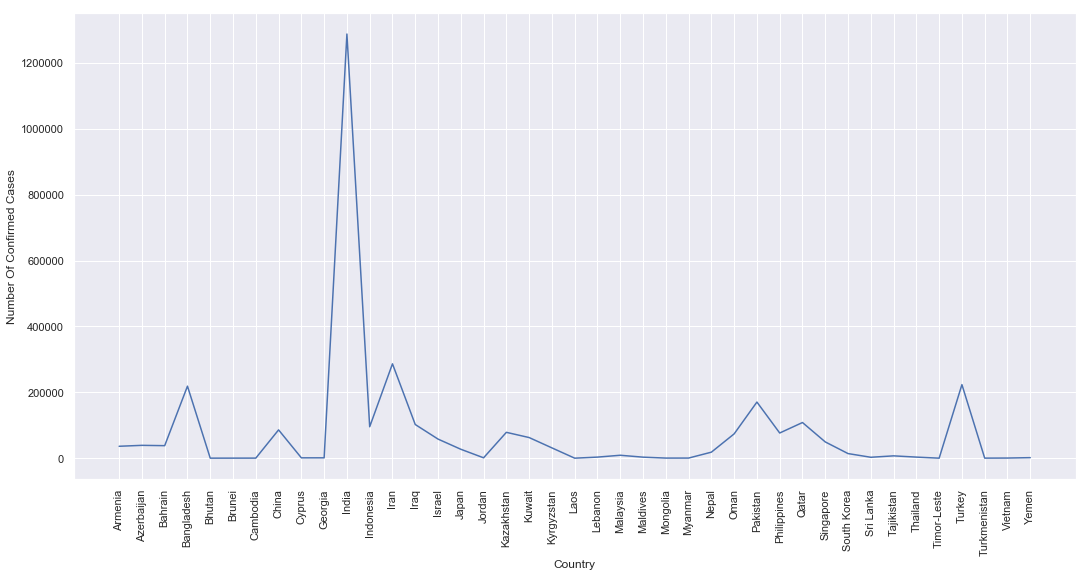

<Figure size 720x360 with 0 Axes>

In [471]:
import matplotlib.pyplot as plt
plt.plot(df_rates_new['Country'], df_rates_new['Confirmed Cases'])
plt.xticks(rotation=90) 
plt.xlabel("Country")
plt.ylabel("Number Of Confirmed Cases")
plt.figure(figsize=(10, 5))
plt.show()

In [472]:
#GDP data last updated 7/1/2020
#Data Source	World Development Indicators		
df_GDP = pd.read_csv('Countries_GDP.csv')

In [475]:
array = ['Armenia', 'Azerbaijan', 'Bahrain','Bangladesh','Bhutan', 'Brunei','Cambodia', 'China','Cyprus','Georgia' ,'Indonesia', 'India','Iran','Iraq','Israel','Japan','Jordan', 'Kazakhstan','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','Oman','Pakistan', 'Philippines', 'Qatar','Singapore','South Korea','Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste','Turkey','Turkmenistan','Vietnam', 'Yemen']
#Filtering data
df_GDP_new = df_GDP.loc[df_GDP['Country Name'].isin(array)]
df_GDP_new['2019'] = df_GDP_new.apply(
    lambda row: row['2018'] if np.isnan(row['2019']) else row['2019'],
    axis=1
)
df_GDP_new['2019'] = df_GDP_new.apply(
    lambda row: row['2017'] if np.isnan(row['2019']) else row['2019'],
    axis=1
)
df_GDP_new.shape


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(41, 64)

#### Analysing Number Of Cases and GDP

In [477]:

df_GDP_new.sort_values('Country Name', ascending=True, inplace=True)
df_GDP_new = df_GDP_new.reset_index()
cases_col = df_rates_new['Confirmed Cases']
df_GDP_new['Confirmed Cases'] = cases_col
df_GDP_new = df_GDP_new.sort_values('Confirmed Cases', ascending = True)
df_GDP_new

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Confirmed Cases
20,127,Laos,LAO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,1378.361365,1581.395403,1825.665113,1998.335215,2134.711796,2308.800482,2423.846203,2542.486528,2534.898277,20.0
36,235,Timor-Leste,TLS,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,947.513730,1013.050451,1210.033296,1232.456832,1334.661956,1358.201692,1294.715534,1237.102682,1294.188934,24.0
4,30,Bhutan,BTN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,2563.257527,2538.945900,2472.714309,2652.214589,2752.664208,2930.562989,3286.574703,3243.231126,3243.231126,92.0
5,29,Brunei,BRN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,47055.841120,47740.514900,44740.085020,41726.783970,31164.562030,27157.823410,28572.146780,31628.328790,31086.751080,141.0
38,233,Turkmenistan,TKM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,5649.952278,6675.185658,7304.287132,7962.239098,6432.680702,6389.548408,6587.090316,6966.635411,6966.635411,170.0
6,121,Cambodia,KHM,GDP per capita (current US$),NY.GDP.PCAP.CD,111.342480,109.460387,109.481225,117.823488,123.645808,...,882.275493,950.880346,1013.420401,1093.496191,1162.904920,1269.591257,1385.259980,1512.126710,1643.121389,202.0
24,161,Mongolia,MNG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,3757.558633,4351.886920,4366.075901,4158.525715,3918.579174,3660.150746,3669.417540,4134.987198,4295.235025,288.0
25,158,Myanmar,MMR,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,1176.242453,1165.794329,1162.331440,1251.820765,1287.430487,1266.546338,1291.542413,1418.177623,1407.813143,343.0
39,255,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,1525.115988,1735.141276,1886.671896,2030.261955,2085.101484,2192.214539,2365.621666,2566.596950,2715.276036,413.0
8,51,Cyprus,CYP,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,...,32396.385740,28912.156940,27729.192700,27129.626120,23333.714910,24532.519060,26338.694340,28689.706720,27858.371000,1040.0


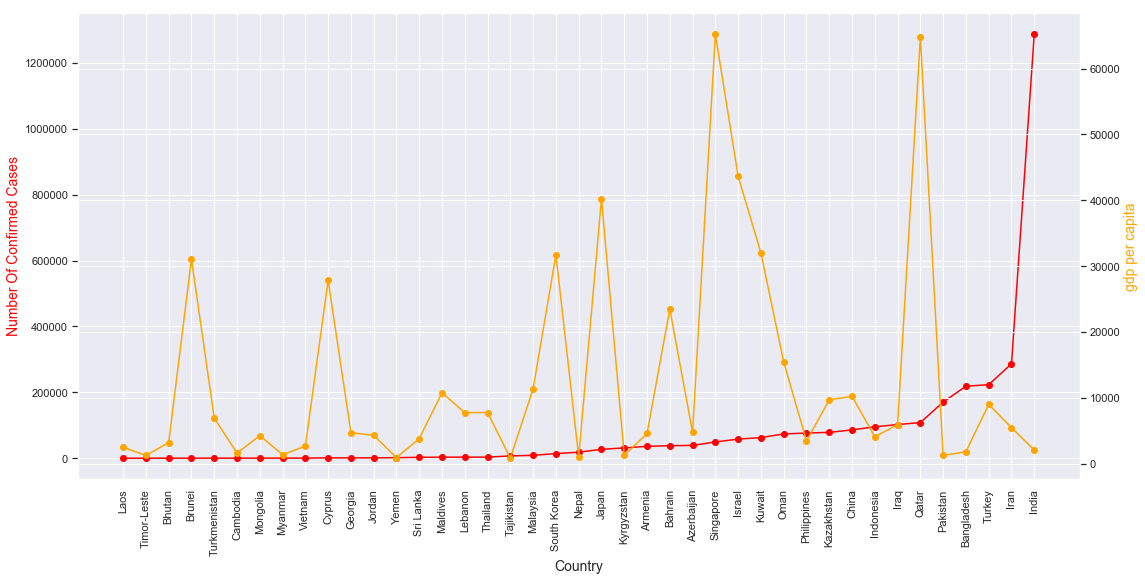

<Figure size 720x360 with 0 Axes>

In [478]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_GDP_new['Country Name'], df_GDP_new['Confirmed Cases'], color="red", marker="o")
#set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Number Of Confirmed Cases",color="red",fontsize=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
# # twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# # make a plot with different y-axis using second axis object
ax2.plot(df_GDP_new['Country Name'], df_GDP_new['2019'],color="orange",marker="o")
ax2.set_ylabel("gdp per capita",color="orange",fontsize=14)
plt.figure(figsize=(10, 5))
plt.show()

#### Deaths By Country

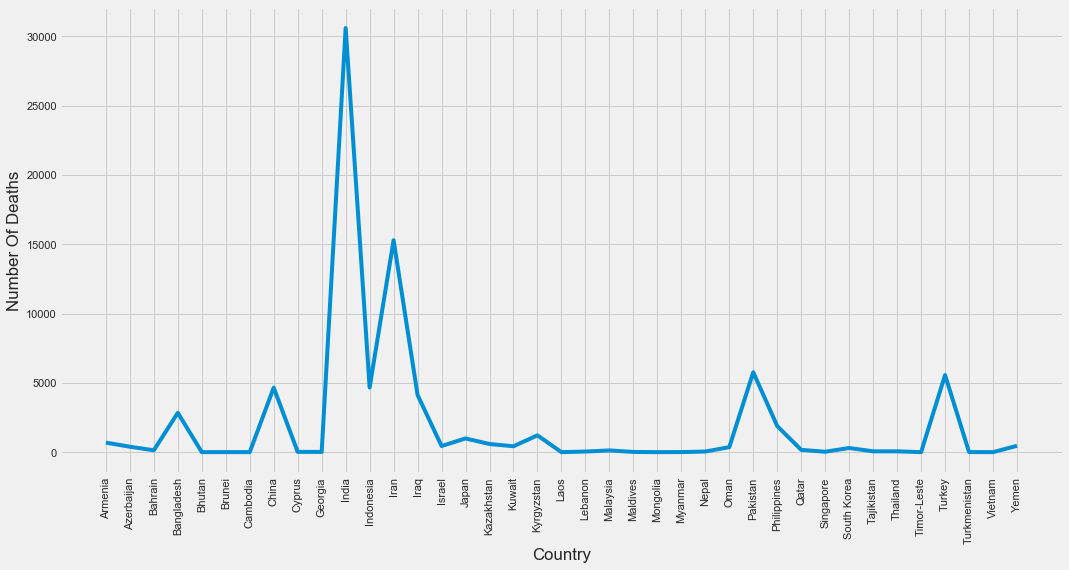

<Figure size 720x360 with 0 Axes>

In [291]:
import matplotlib.pyplot as plt
plt.plot(df_rates_new['Country'], df_rates_new['Deaths'])
plt.xticks(rotation=90) 
plt.xlabel("Country")
plt.ylabel("Number Of Deaths")
plt.figure(figsize=(10, 5))
plt.show()

#### Analysing Death Rate and GDP

In [482]:
# calculating death rate
df_rates_new['Death Rate'] = df_rates_new['Deaths'] / df_rates_new['Confirmed Cases']
# df_rates_new.drop("Sales", axis=1, inplace=True)
GDP_col = df_GDP_new['2019']
df_rates_new['GDP'] = GDP_col
# sort data according to ascending death rate
df_rates_new = df_rates_new.sort_values('Death Rate', ascending = True)
df_rates_new


,index,Country,Confirmed Cases,Recovered,Deaths,Death Rate,GDP
20,20,Laos,20.0,19.0,0.0,0.000000,2534.898277
39,45,Vietnam,413.0,365.0,0.0,0.000000,2715.276036
24,24,Mongolia,288.0,217.0,0.0,0.000000,4295.235025
6,6,Cambodia,202.0,142.0,0.0,0.000000,1643.121389
4,4,Bhutan,92.0,83.0,0.0,0.000000,3243.231126
36,40,Timor-Leste,24.0,24.0,0.0,0.000000,1294.188934
31,33,Singapore,49375.0,45015.0,27.0,0.000547,65233.282440
30,31,Qatar,108244.0,105018.0,164.0,0.001515,64781.733200
26,26,Nepal,18241.0,12840.0,43.0,0.002357,1071.050761
2,2,Bahrain,37996.0,34412.0,134.0,0.003527,23503.977130


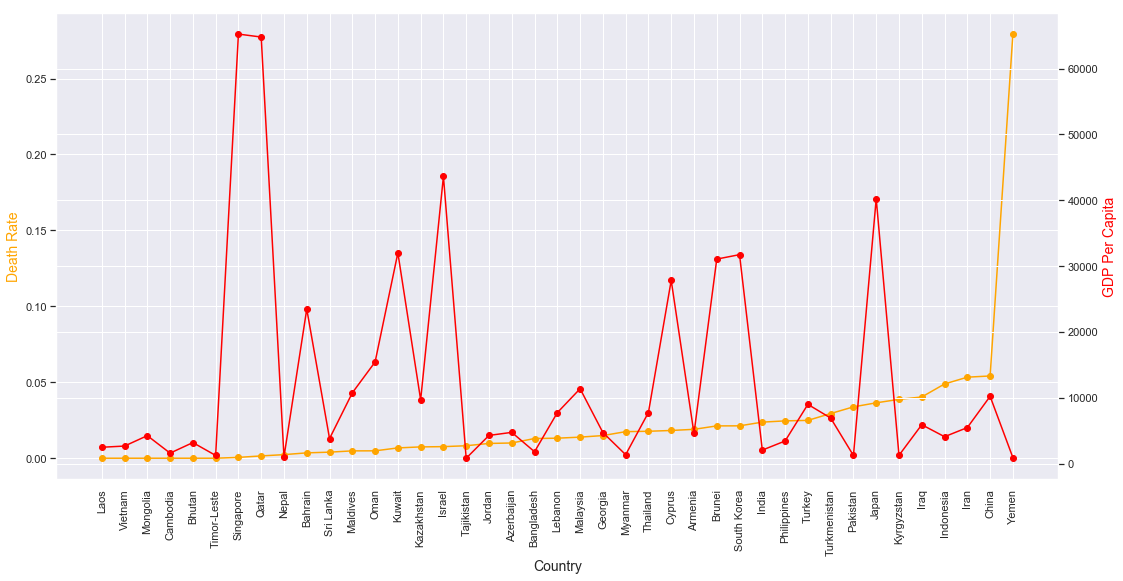

<Figure size 720x360 with 0 Axes>

In [484]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_rates_new['Country'], df_rates_new['Death Rate'], color="orange", marker="o")
# set x-axis label
ax.set_xlabel("Country",fontsize=14)
# set y-axis label
ax.set_ylabel("Death Rate",color="orange",fontsize=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_rates_new['Country'], df_rates_new['GDP'],color="red",marker="o")
ax2.set_ylabel("GDP Per Capita",color="red",fontsize=14)
plt.figure(figsize=(10, 5))
plt.show()

##From the plotted graph, we can see that countries with lower GDP per capita tend to have a higher death reate

In [488]:
# calculating recovery rate
df_rates_new['Recovery Rate'] = df_rates_new['Recovered'] / df_rates_new['Confirmed Cases']
df_rates_new
# removing rows with NaN for Recovery Rate
df_rates_new.dropna(subset = ["Recovery Rate"], inplace=True)
df_rates_new = df_rates_new.sort_values('Recovery Rate', ascending=True)
df_rates_new


,index,Country,Confirmed Cases,Recovered,Deaths,Death Rate,GDP,Recovery Rate
29,30,Philippines,76444.0,24502.0,1879.0,0.024580,3485.084218,0.320522
38,42,Turkmenistan,170.0,58.0,5.0,0.029412,6966.635411,0.341176
14,14,Israel,57982.0,24044.0,442.0,0.007623,43641.397740,0.414680
40,46,Yemen,1640.0,751.0,458.0,0.279268,968.159048,0.457927
21,21,Lebanon,3260.0,1619.0,43.0,0.013190,7784.316857,0.496626
1,1,Azerbaijan,38980.0,20974.0,391.0,0.010031,4793.587020,0.538071
3,3,Bangladesh,218658.0,120976.0,2836.0,0.012970,1855.739824,0.553266
11,11,Indonesia,95418.0,53945.0,4665.0,0.048890,4135.569263,0.565355
19,19,Kyrgyzstan,31247.0,18038.0,1211.0,0.038756,1309.392992,0.577271
27,28,Oman,73791.0,45150.0,359.0,0.004865,15474.032480,0.611863


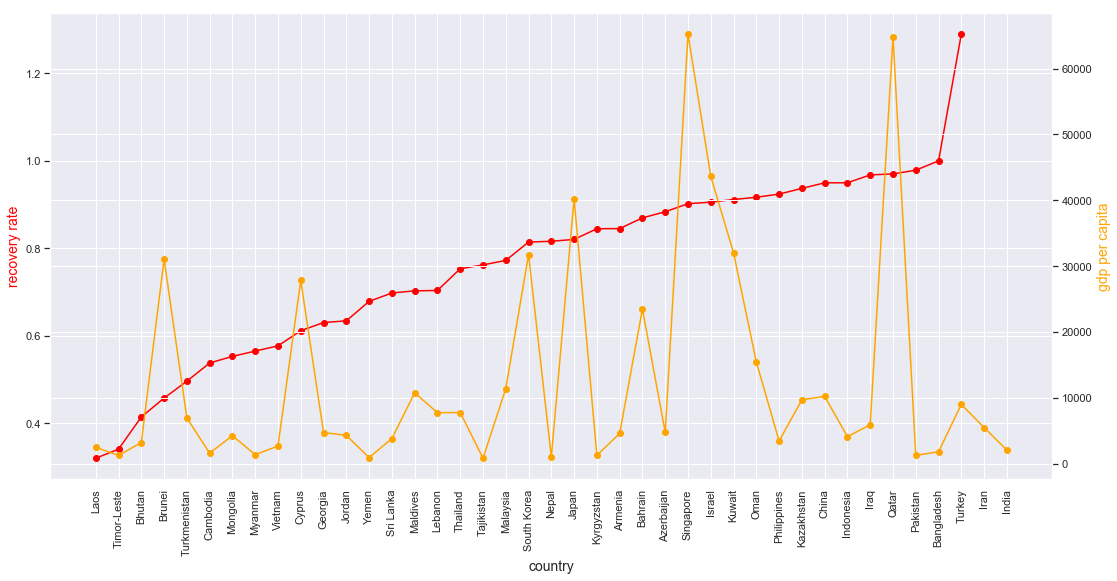

<Figure size 720x360 with 0 Axes>

In [489]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_rates_new['Country'], df_rates_new['Recovery Rate'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("country",fontsize=14)
# set y-axis label
ax.set_ylabel("recovery rate",color="red",fontsize=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_GDP_new['Country Name'], df_GDP_new['2019'],color="orange",marker="o")
ax2.set_ylabel("gdp per capita",color="orange",fontsize=14)
plt.figure(figsize=(10, 5))
plt.show()

## Trend seems to be the sameas death rate

In [22]:
# sort according to ascending number of cases
df_GDP_new.sort_values(by=['2019'])

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
232,Tajikistan,TJK,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,749.552711,847.382102,969.296473,1048.227293,1104.171689,929.095857,802.518004,806.041573,826.621530,870.787589
176,Nepal,NPL,GDP per capita (current US$),NY.GDP.PCAP.CD,50.304988,51.811229,55.025699,46.861449,46.003365,67.007471,...,592.401097,699.429338,698.466479,715.923743,743.413381,792.552891,777.147595,911.444266,1038.651647,1071.050761
182,Pakistan,PAK,GDP per capita (current US$),NY.GDP.PCAP.CD,83.337946,89.409030,91.319200,95.703362,104.880218,116.446725,...,987.409723,1164.976129,1198.109001,1208.904310,1251.164104,1356.667756,1368.454326,1464.993305,1482.305667,1284.702041
235,Timor-Leste,TLS,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,806.407862,947.513730,1013.050451,1210.033296,1232.456832,1334.661956,1358.201692,1294.715534,1237.102682,1294.188934
158,Myanmar,MMR,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,979.051630,1176.242453,1165.794329,1162.331440,1251.820765,1287.430487,1266.546338,1291.542413,1418.177623,1407.813143
121,Cambodia,KHM,GDP per capita (current US$),NY.GDP.PCAP.CD,111.342480,109.460387,109.481225,117.823488,123.645808,134.304155,...,785.502283,882.275493,950.880346,1013.420401,1093.496191,1162.904920,1269.591257,1385.259980,1512.126710,1643.121389
18,Bangladesh,BGD,GDP per capita (current US$),NY.GDP.PCAP.CD,89.035241,97.595274,100.122116,101.901415,100.221114,106.646648,...,781.153594,861.758444,883.105001,981.839879,1118.853663,1248.453398,1401.620466,1563.913857,1698.350394,1855.739824
107,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,82.188602,85.354301,89.881757,101.126428,115.537497,119.318917,...,1357.563719,1458.103527,1443.879529,1449.605912,1573.881492,1605.605434,1732.564262,1981.651050,2005.863005,2104.145900
255,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1317.890706,1525.115988,1735.141276,1886.671896,2030.261955,2085.101484,2192.214539,2365.621666,2566.596950,2715.276036
30,Bhutan,BTN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2258.183141,2563.257527,2538.945900,2472.714309,2652.214589,2752.664208,2930.562989,3286.574703,3243.231126,3243.231126


#### Prediction Model For Singapore Cases (Unsuccessful)

In [251]:
cases_daily = pd.read_csv('time_series_covid_19_confirmed.csv')
cases_singapore = cases_daily.loc[cases_daily['Country/Region'] == 'Singapore']
cases_singapore.head()
cases_singapore_daily = cases_singapore.drop(columns=['Province/State', 'Country/Region','Lat', 'Long'])
cases_singapore_daily_T = cases_singapore_daily.T
cases_singapore_daily_T.rename(columns={196: 'Number Of Cases'}, inplace=True)
cases_singapore_daily_T.index.name = 'Date'
cases_singapore_daily_T.index = pd.to_datetime(cases_singapore_daily_T.index)
cases_singapore_daily_T

,Number Of Cases
Date,
2020-01-22,0
2020-01-23,1
2020-01-24,3
2020-01-25,3
2020-01-26,4
2020-01-27,5
2020-01-28,7
2020-01-29,7
2020-01-30,10


[Text(0, 0.5, 'Number Of Comfirmed Cases'), Text(0.5, 0, 'Day')]

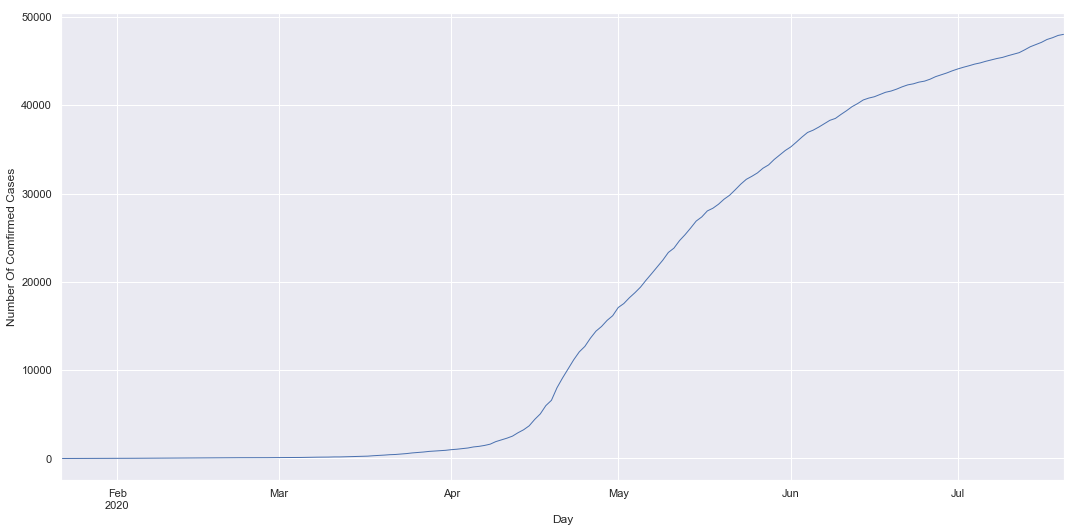

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16, 8)})
ax = cases_singapore_daily_T['Number Of Cases'].plot(linewidth=1)
ax.set(xlabel="Day", ylabel = "Number Of Comfirmed Cases")

In [253]:

#Converting the dataframe to a numpy array
dataset = cases_singapore_daily_T.values
#Get /Compute the number of rows to train the model on
training_data_length = math.ceil( len(dataset) *.6) 
dataset = dataset.reshape(-1, 1)

In [254]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.00000000e+00],
       [2.08181534e-05],
       [6.24544603e-05],
       [6.24544603e-05],
       [8.32726137e-05],
       [1.04090767e-04],
       [1.45727074e-04],
       [1.45727074e-04],
       [2.08181534e-04],
       [2.70635995e-04],
       [3.33090455e-04],
       [3.74726762e-04],
       [3.74726762e-04],
       [4.99635682e-04],
       [5.82908296e-04],
       [5.82908296e-04],
       [6.24544603e-04],
       [6.86999063e-04],
       [8.32726137e-04],
       [9.36816904e-04],
       [9.78453211e-04],
       [1.04090767e-03],
       [1.20745290e-03],
       [1.39481628e-03],
       [1.49890705e-03],
       [1.56136151e-03],
       [1.60299781e-03],
       [1.68627043e-03],
       [1.74872489e-03],
       [1.74872489e-03],
       [1.76954304e-03],
       [1.76954304e-03],
       [1.85281566e-03],
       [1.85281566e-03],
       [1.89445196e-03],
       [1.93608827e-03],
       [1.93608827e-03],
       [1.93608827e-03],
       [2.12345165e-03],
       [2.20672426e-03],


In [255]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_length  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    

In [256]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [257]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [258]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [259]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

49/49 [==============================] - 2s 37ms/step - loss: 0.0082


In [260]:
#Test data set
test_data = scaled_data[training_data_length - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_length : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [261]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [262]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
#Undo scaling
predictions

array([[23174.438],
       [24129.3  ],
       [25079.127],
       [26032.713],
       [26986.68 ],
       [27942.668],
       [28903.744],
       [29854.672],
       [30796.77 ],
       [31711.664],
       [32595.523],
       [33453.03 ],
       [34281.96 ],
       [35090.43 ],
       [35886.074],
       [36669.652],
       [37431.754],
       [38168.902],
       [38887.33 ],
       [39583.742],
       [40268.793],
       [40944.684],
       [41613.793],
       [42272.457],
       [42925.38 ],
       [43577.133],
       [44228.094],
       [44865.79 ],
       [45486.508],
       [46090.305],
       [46677.934],
       [47242.168],
       [47790.523],
       [48327.168],
       [48857.234],
       [49378.73 ],
       [49893.574],
       [50393.957],
       [50872.19 ],
       [51328.645],
       [51764.87 ],
       [52177.08 ],
       [52567.332],
       [52939.965],
       [53296.426],
       [53633.586],
       [53953.58 ],
       [54254.83 ],
       [54542.01 ],
       [54822.207],


In [264]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


8983.591247351318

In [265]:
#Plot/Create the data for the graph
train = cases_singapore_daily_T[:training_data_length]
valid = cases_singapore_daily_T[training_data_length:]
valid['Predictions'] = predictions.ravel()
valid

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Number Of Cases,Predictions
Date,,
2020-05-10,23336,23174.437500
2020-05-11,23822,24129.300781
2020-05-12,24671,25079.126953
2020-05-13,25346,26032.712891
2020-05-14,26098,26986.679688
2020-05-15,26891,27942.667969
2020-05-16,27356,28903.744141
2020-05-17,28038,29854.671875
2020-05-18,28343,30796.769531


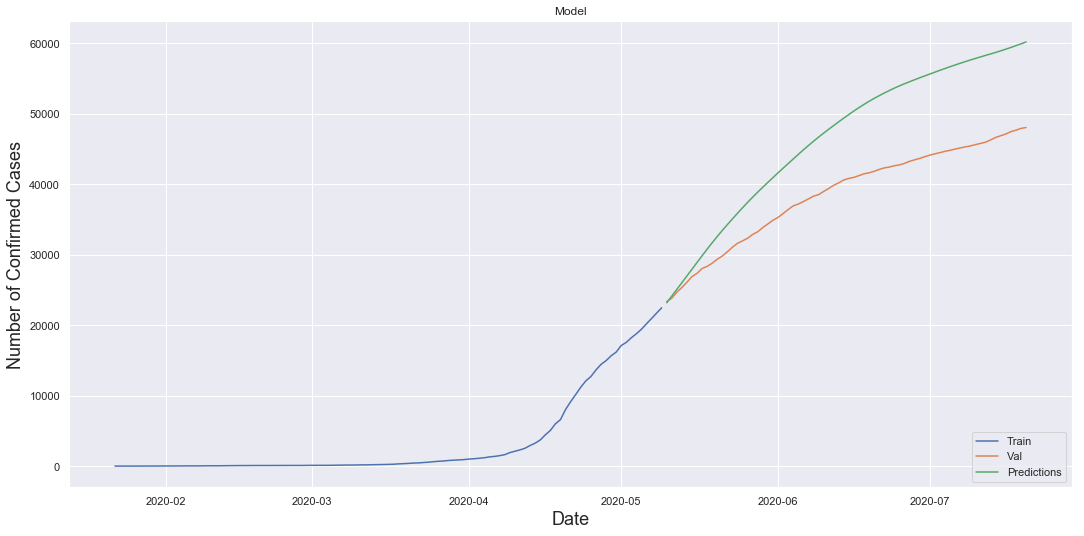

In [267]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
#plt.xticks(rotation=90) 
plt.ylabel('Number of Confirmed Cases', fontsize=18)
plt.plot(train['Number Of Cases'])
plt.plot(valid[['Number Of Cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#### Decision Tree Prediction Model (Successful)

In [490]:
future_days = 14
cases_singapore_daily_T['Prediction'] = cases_singapore_daily_T[['Number Of Cases']].shift(-future_days)
cases_singapore_daily_T.tail()


,Number Of Cases,Prediction
Date,,
2020-07-16,47126,NaN
2020-07-17,47453,NaN
2020-07-18,47655,NaN
2020-07-19,47912,NaN
2020-07-20,48035,NaN


In [271]:
X = np.array(cases_singapore_daily_T.drop(['Prediction'], 1))[:-future_days]
print(X)

[[    0]
 [    1]
 [    3]
 [    3]
 [    4]
 [    5]
 [    7]
 [    7]
 [   10]
 [   13]
 [   16]
 [   18]
 [   18]
 [   24]
 [   28]
 [   28]
 [   30]
 [   33]
 [   40]
 [   45]
 [   47]
 [   50]
 [   58]
 [   67]
 [   72]
 [   75]
 [   77]
 [   81]
 [   84]
 [   84]
 [   85]
 [   85]
 [   89]
 [   89]
 [   91]
 [   93]
 [   93]
 [   93]
 [  102]
 [  106]
 [  108]
 [  110]
 [  110]
 [  117]
 [  130]
 [  138]
 [  150]
 [  150]
 [  160]
 [  178]
 [  178]
 [  200]
 [  212]
 [  226]
 [  243]
 [  266]
 [  313]
 [  345]
 [  385]
 [  432]
 [  455]
 [  509]
 [  558]
 [  631]
 [  683]
 [  732]
 [  802]
 [  844]
 [  879]
 [  926]
 [ 1000]
 [ 1049]
 [ 1114]
 [ 1189]
 [ 1309]
 [ 1375]
 [ 1481]
 [ 1623]
 [ 1910]
 [ 2108]
 [ 2299]
 [ 2532]
 [ 2918]
 [ 3252]
 [ 3699]
 [ 4427]
 [ 5050]
 [ 5992]
 [ 6588]
 [ 8014]
 [ 9125]
 [10141]
 [11178]
 [12075]
 [12693]
 [13624]
 [14423]
 [14951]
 [15641]
 [16169]
 [17101]
 [17548]
 [18205]
 [18778]
 [19410]
 [20198]
 [20939]
 [21707]
 [22460]
 [23336]
 [23822]
 

In [273]:
Y = np.array(cases_singapore_daily_T['Prediction'])[:-future_days] 
print(Y)

[2.8000e+01 2.8000e+01 3.0000e+01 3.3000e+01 4.0000e+01 4.5000e+01
 4.7000e+01 5.0000e+01 5.8000e+01 6.7000e+01 7.2000e+01 7.5000e+01
 7.7000e+01 8.1000e+01 8.4000e+01 8.4000e+01 8.5000e+01 8.5000e+01
 8.9000e+01 8.9000e+01 9.1000e+01 9.3000e+01 9.3000e+01 9.3000e+01
 1.0200e+02 1.0600e+02 1.0800e+02 1.1000e+02 1.1000e+02 1.1700e+02
 1.3000e+02 1.3800e+02 1.5000e+02 1.5000e+02 1.6000e+02 1.7800e+02
 1.7800e+02 2.0000e+02 2.1200e+02 2.2600e+02 2.4300e+02 2.6600e+02
 3.1300e+02 3.4500e+02 3.8500e+02 4.3200e+02 4.5500e+02 5.0900e+02
 5.5800e+02 6.3100e+02 6.8300e+02 7.3200e+02 8.0200e+02 8.4400e+02
 8.7900e+02 9.2600e+02 1.0000e+03 1.0490e+03 1.1140e+03 1.1890e+03
 1.3090e+03 1.3750e+03 1.4810e+03 1.6230e+03 1.9100e+03 2.1080e+03
 2.2990e+03 2.5320e+03 2.9180e+03 3.2520e+03 3.6990e+03 4.4270e+03
 5.0500e+03 5.9920e+03 6.5880e+03 8.0140e+03 9.1250e+03 1.0141e+04
 1.1178e+04 1.2075e+04 1.2693e+04 1.3624e+04 1.4423e+04 1.4951e+04
 1.5641e+04 1.6169e+04 1.7101e+04 1.7548e+04 1.8205e+04 1.8778

In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)


In [279]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)
x_future = cases_singapore_daily_T.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[42432],
       [42623],
       [42736],
       [42955],
       [43246],
       [43459],
       [43661],
       [43907],
       [44122],
       [44310],
       [44479],
       [44664],
       [44800],
       [44983]], dtype=int64)

In [282]:
# Show model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[45140. 45423. 45423. 45614. 45961. 45961. 46283. 46630. 47126. 47126.
 47126. 47655. 47912. 48035.]

[48004.41106784 48206.22222078 48325.61834792 48557.01438192
 48864.48582436 49089.542241   49302.97602579 49562.90033795
 49790.06996038 49988.71130464 50167.27719389 50362.74872946
 50506.44672318 50699.80505297]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


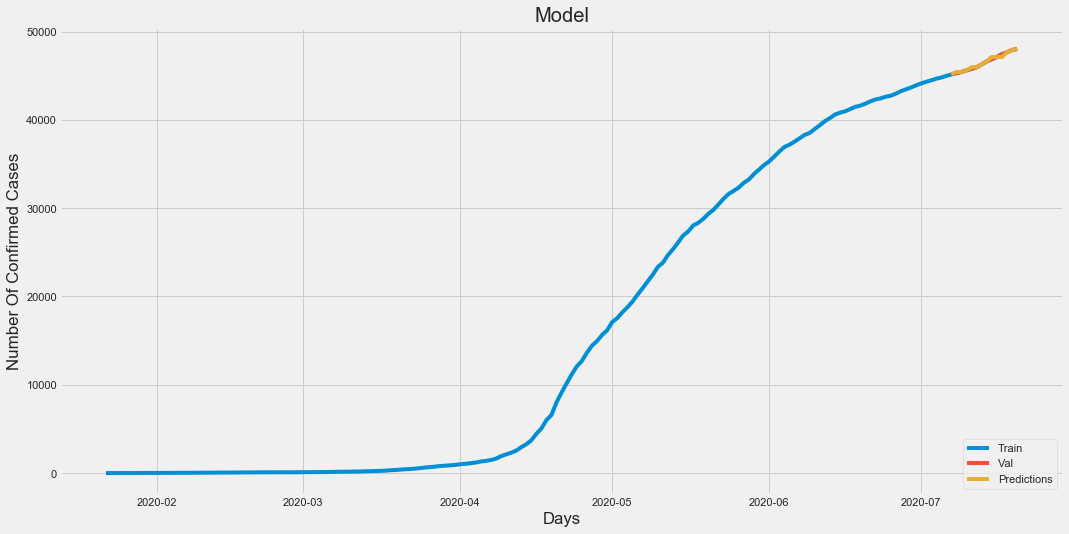

In [284]:
predictions = tree_prediction

valid =cases_singapore_daily_T[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Days")
plt.ylabel('Number Of Confirmed Cases')
plt.plot(cases_singapore_daily_T['Number Of Cases'])
plt.plot(valid[['Number Of Cases', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [497]:
# Evaluating our model
score = tree.score(x_test, y_test)
print(score)
#Accuracy is acceptable

0.9996271669591711
